In [251]:
import matplotlib.pyplot as plt
import numpy as np
n=11000
n1=10600
alpha_1=3.9
alpha_2=3.9
alpha_3=3.9
sigma_1=1
sigma_2=1
sigma_3=1
mu_1=0.001
mu_2=0.001
mu_3=0.001
gamma_1=0
gamma_2=0
g1=0
g2=7
x_rp=-1.5
betta_syn=0.0001
sigma_syn=1

In [252]:
def fun(x, y, z, a):
    if x <= 0:
        res=a/(1-x)+y
    elif (x<(a+y)) and (z<=0):
        res=a + y
    elif (x>=(a+y)) or (z>0):
        res=-1
    return res

In [253]:
def xi(x):
    if(x>-0.8):
        res=1
    else:
        res=0
    return res

In [254]:
x1=[]
y1=[]
z1=[]
x2=[]
y2=[]
z2=[]
x3=[]
y3=[]
z3=[]
I11=[]
I12=[]
I21=[]
I22=[]
I31=[]
I32=[]
T=[]

for i in range(n):
    x1+=[0.0]
    y1+=[0.0]
    z1+=[0.0]
    x2+=[0.0]
    y2+=[0.0]
    z2+=[0.0]
    x3+=[0.0]
    y3+=[0.0]
    z3+=[0.0]
    I11+=[0.0]
    I12+=[0.0]
    I21+=[0.0]
    I22+=[0.0]
    I31+=[0.0]
    I32+=[0.0]
    T+=[i]

In [255]:
if((g1>0)&(g2>0)):
    K1=2.0
    K2=2.0
    K3=2.0
else:
    K1=1.0
    K2=1.0
    K3=1.0

In [256]:
x1[0]=0
y1[0]=0
z1[0]=0

x2[0]=0.5
y2[0]=-1.5
z2[0]=0

x3[0]=-1
y3[0]=-2.8
z3[0]=0

I11[0]=g1*(x_rp-x1[0])*xi(x3[0])
I12[0]=g2*(x_rp-x1[0])*xi(x2[0])
x1[1]=fun(x1[0], (y1[0]+betta_syn*(I11[0]+I12[0])/(K1)), z1[0], alpha_1)
y1[1]=y1[0]+mu_1*(-x1[0]-1+sigma_1+sigma_syn*(I11[0]+I12[0])/(K1))
z1[1]=x1[0]


I21[0]=g1*(x_rp-x2[0])*xi(x1[0])
I22[0]=g2*(x_rp-x2[0])*xi(x3[0])
x2[1]=fun(x2[0], (y2[0]+betta_syn*(I21[0]+I22[0])/(K2)), z2[0], alpha_2)
y2[1]=y2[0]+mu_1*(-x2[0]-1+sigma_2+sigma_syn*(I21[0]+I22[0])/(K2))
z2[1]=x2[0]


I31[0]=g1*(x_rp-x3[0])*xi(x2[0])
I32[0]=g2*(x_rp-x3[0])*xi(x1[0])
x3[1]=fun(x3[0], (y3[0]+betta_syn*(I31[0]+I32[0])/(K3)), z3[0], alpha_3)
y3[1]=y3[0]+mu_1*(-x3[0]-1+sigma_3+sigma_syn*(I31[0]+I32[0])/(K3))
z3[1]=x3[0]

In [257]:
for i in range(n-1):
    if(i>0):
        I11[i]=g1*(x_rp-x1[i])*xi(x3[i])
        I12[i]=g2*(x_rp-x1[i])*xi(x2[i])
        x1[i+1]=fun(x1[i], (y1[i]+betta_syn*(I11[i]+I12[i])/(K1)), z1[i], alpha_1)
        y1[i+1]=y1[i]+mu_1*(-x1[i]-1+sigma_1+sigma_syn*(I11[i]+I12[i])/(K1))
        z1[i+1]=x1[i]


        I21[i]=g1*(x_rp-x2[i])*xi(x1[i])
        I22[i]=g2*(x_rp-x2[i])*xi(x3[i])
        x2[i+1]=fun(x2[i], (y2[i]+betta_syn*(I21[i]+I22[i])/(K2)), z2[i], alpha_2)
        y2[i+1]=y2[i]+mu_1*(-x2[i]-1+sigma_2+sigma_syn*(I21[i]+I22[i])/(K2))
        z2[i+1]=x2[i]


        I31[i]=g1*(x_rp-x3[i])*xi(x2[i])
        I32[i]=g2*(x_rp-x3[i])*xi(x1[i])
        x3[i+1]=fun(x3[i], (y3[i]+betta_syn*(I31[i]+I32[i])/(K3)), z3[i], alpha_3)
        y3[i+1]=y3[i]+mu_1*(-x3[i]-1+sigma_3+sigma_syn*(I31[i]+I32[i])/(K3))
        z3[i+1]=x3[i]

In [258]:
X1=[]
T1=[]
X2=[]
X3=[]
T2=[]
k=n-n1
for i in range(k):
    X1+=[x1[n-(k-i)]]
    X2+=[x2[n-(k-i)]]
    X3+=[x3[n-(k-i)]]
    T1+=[T[n-(k-i)]]

In [259]:
    x1=x1[n1:n]
    y1=y1[n1:n]
    z1=z1[n1:n]
    x2=x2[n1:n]
    y2=y2[n1:n]
    z2=z2[n1:n]
    x3=x3[n1:n]
    y3=y3[n1:n]
    z3=z3[n1:n]
    T=T[n1:n]


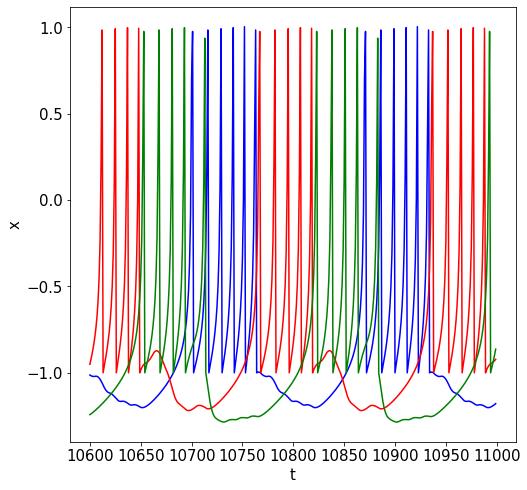

In [260]:
fig, ax = plt.subplots(figsize = (8, 8))
ax.plot(T, x1, color = 'blue')
ax.plot(T, x2, color = 'red')
ax.plot(T, x3, color = 'green')
plt.xlabel('t', fontsize=15)
plt.ylabel('x', fontsize=15)
plt.tick_params(labelsize=15)
plt.show()

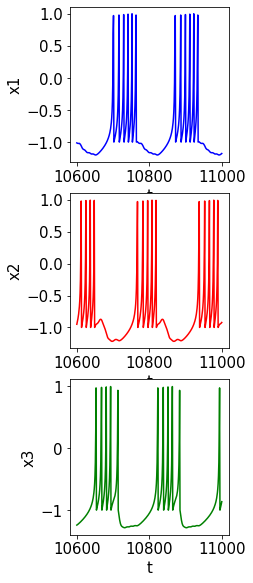

In [261]:
fig=plt.figure()
fig.set_size_inches(20,20)
ax_1 = fig.add_subplot(6, 6, 2)
ax_1.plot(T, x1, color='blue')
plt.xlabel('t', fontsize=15)
plt.ylabel('x1', fontsize=15)
plt.tick_params(labelsize=15)
ax_2 = fig.add_subplot(6, 6, 8)
ax_2.plot(T, x2, color='red')
plt.xlabel('t', fontsize=15)
plt.ylabel('x2', fontsize=15)
plt.tick_params(labelsize=15)
ax_3 = fig.add_subplot(6, 6, 14)
ax_3.plot(T, x3, color='green')
plt.xlabel('t', fontsize=15)
plt.ylabel('x3', fontsize=15)
plt.tick_params(labelsize=15)
plt.show()

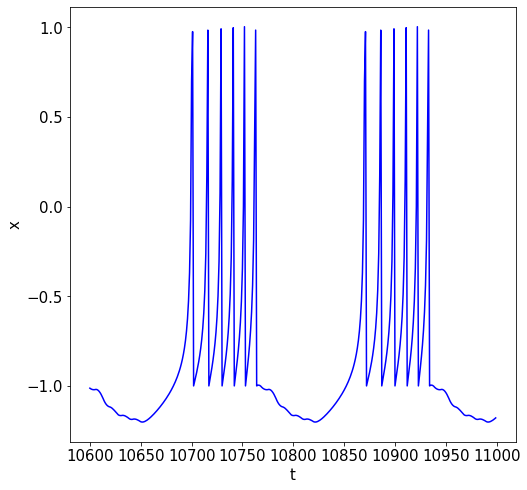

In [262]:
fig, ax = plt.subplots(figsize = (8, 8))
ax.plot(T, x1, color = 'blue')
plt.xlabel('t', fontsize=15)
plt.ylabel('x', fontsize=15)
plt.tick_params(labelsize=15)
plt.show()

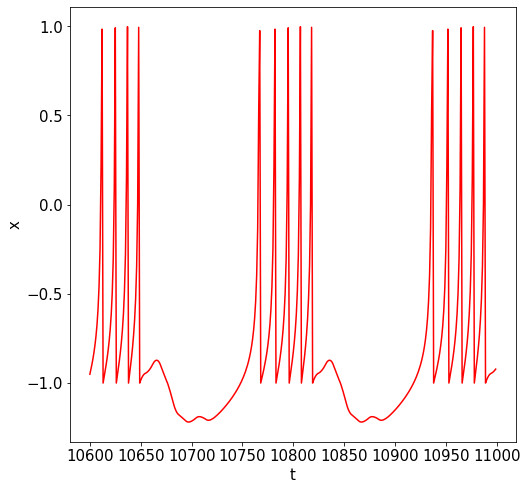

In [263]:
fig, ax = plt.subplots(figsize = (8, 8))
ax.plot(T, x2, color = 'red')
plt.xlabel('t', fontsize=15)
plt.ylabel('x', fontsize=15)
plt.tick_params(labelsize=15)
plt.show()

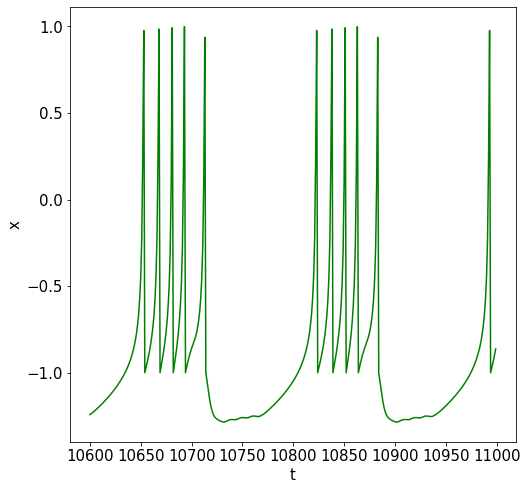

In [264]:
fig, ax = plt.subplots(figsize = (8, 8))
ax.plot(T, x3, color = 'green')
plt.xlabel('t', fontsize=15)
plt.ylabel('x', fontsize=15)
plt.tick_params(labelsize=15)
plt.show()